In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

# generate a daily signal covering one year 2016 in a pandas dataframe
N = 360
df_train = pd.DataFrame({"Date" : pd.date_range(start="2016-01-25", periods=N, freq='D'),
                         "Signal" : (np.arange(N)//40 + np.arange(N) % 21 + np.random.randn(N))})


In [2]:
df_train.head(12)

,Date,Signal
0,2016-01-25,-0.452028
1,2016-01-26,0.705471
2,2016-01-27,2.964566
3,2016-01-28,2.309237
4,2016-01-29,2.846719
5,2016-01-30,4.626437
6,2016-01-31,5.260822
7,2016-02-01,8.564410
8,2016-02-02,9.200623
9,2016-02-03,8.681337


In [3]:
df_train.tail(12)

,Date,Signal
348,2017-01-07,20.489084
349,2017-01-08,19.902185
350,2017-01-09,21.296884
351,2017-01-10,22.627257
352,2017-01-11,24.365931
353,2017-01-12,25.896245
354,2017-01-13,26.098896
355,2017-01-14,26.822232
356,2017-01-15,27.551961
357,2017-01-16,9.447300


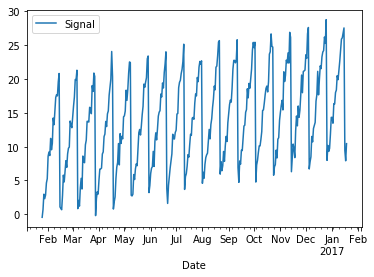

In [4]:
df_train.plot('Date' , ['Signal'])

In [5]:

import pyaf.ForecastEngine as autof
# create a forecast engine. This is the main object handling all the operations
lEngine = autof.cForecastEngine()

# get the best time series model for predicting one week
lEngine.train(iInputDS = df_train, iTime = 'Date', iSignal = 'Signal', iHorizon = 7);
lEngine.getModelInfo() # => relative error 7% (MAPE)


INFO:pyaf.std:START_TRAINING 'Signal'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Signal' 3.3628852367401123
INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2016-01-25T00:00:00.000000 TimeMax=2016-11-01T00:00:00.000000 TimeDelta=<DateOffset: days=1> Horizon=7
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Signal' Min=-0.4520284941973907 Max=28.7773514200024  Mean=13.852103282745984 StdDev=6.804811179487312
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Signal' Min=-0.4520284941973907 Max=28.7773514200024  Mean=13.852103282745984 StdDev=6.804811179487312
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64)' [ConstantTrend + NoCycle + AR]
INFO:pyaf.std:TREND_DETAIL '_Signal_ConstantTrend' [ConstantTrend]
INFO:pyaf.std:CYCLE_DETAIL '_Signal_ConstantTrend_residue_zeroCycle' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64)' [AR]
INFO:pya

INFO:pyaf.std:START_PLOTTING
INFO:pyaf.std:END_PLOTTING_TIME_IN_SECONDS 2.381700277328491


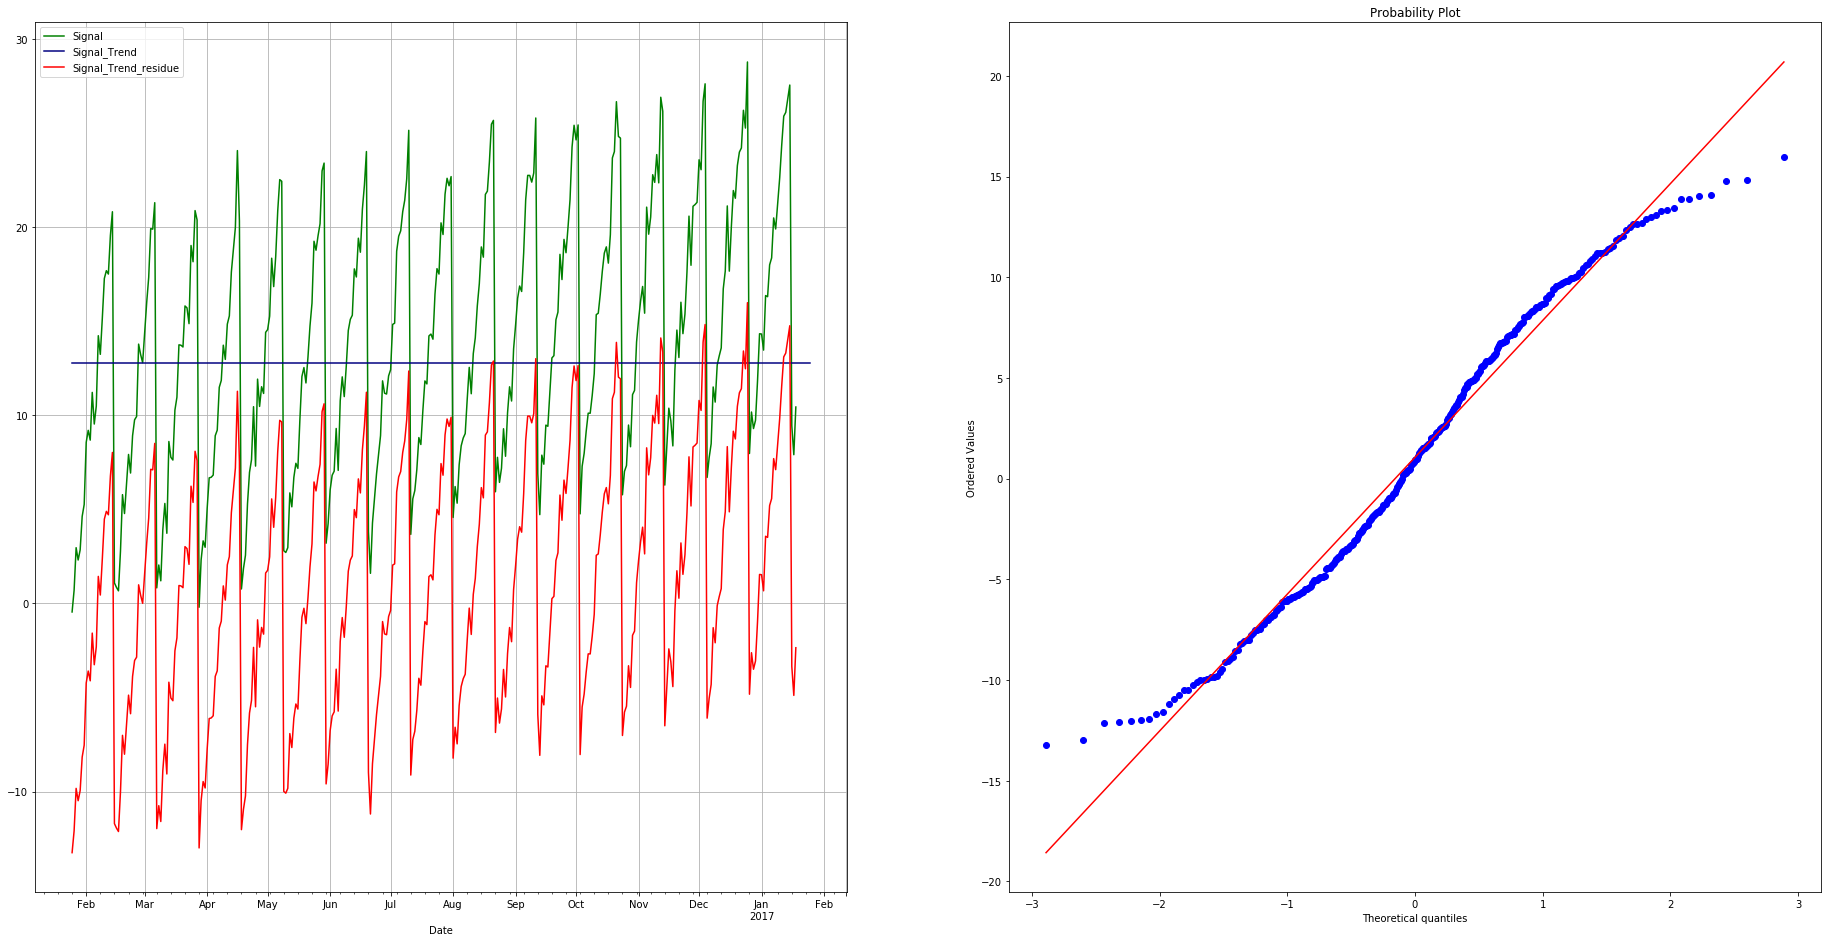

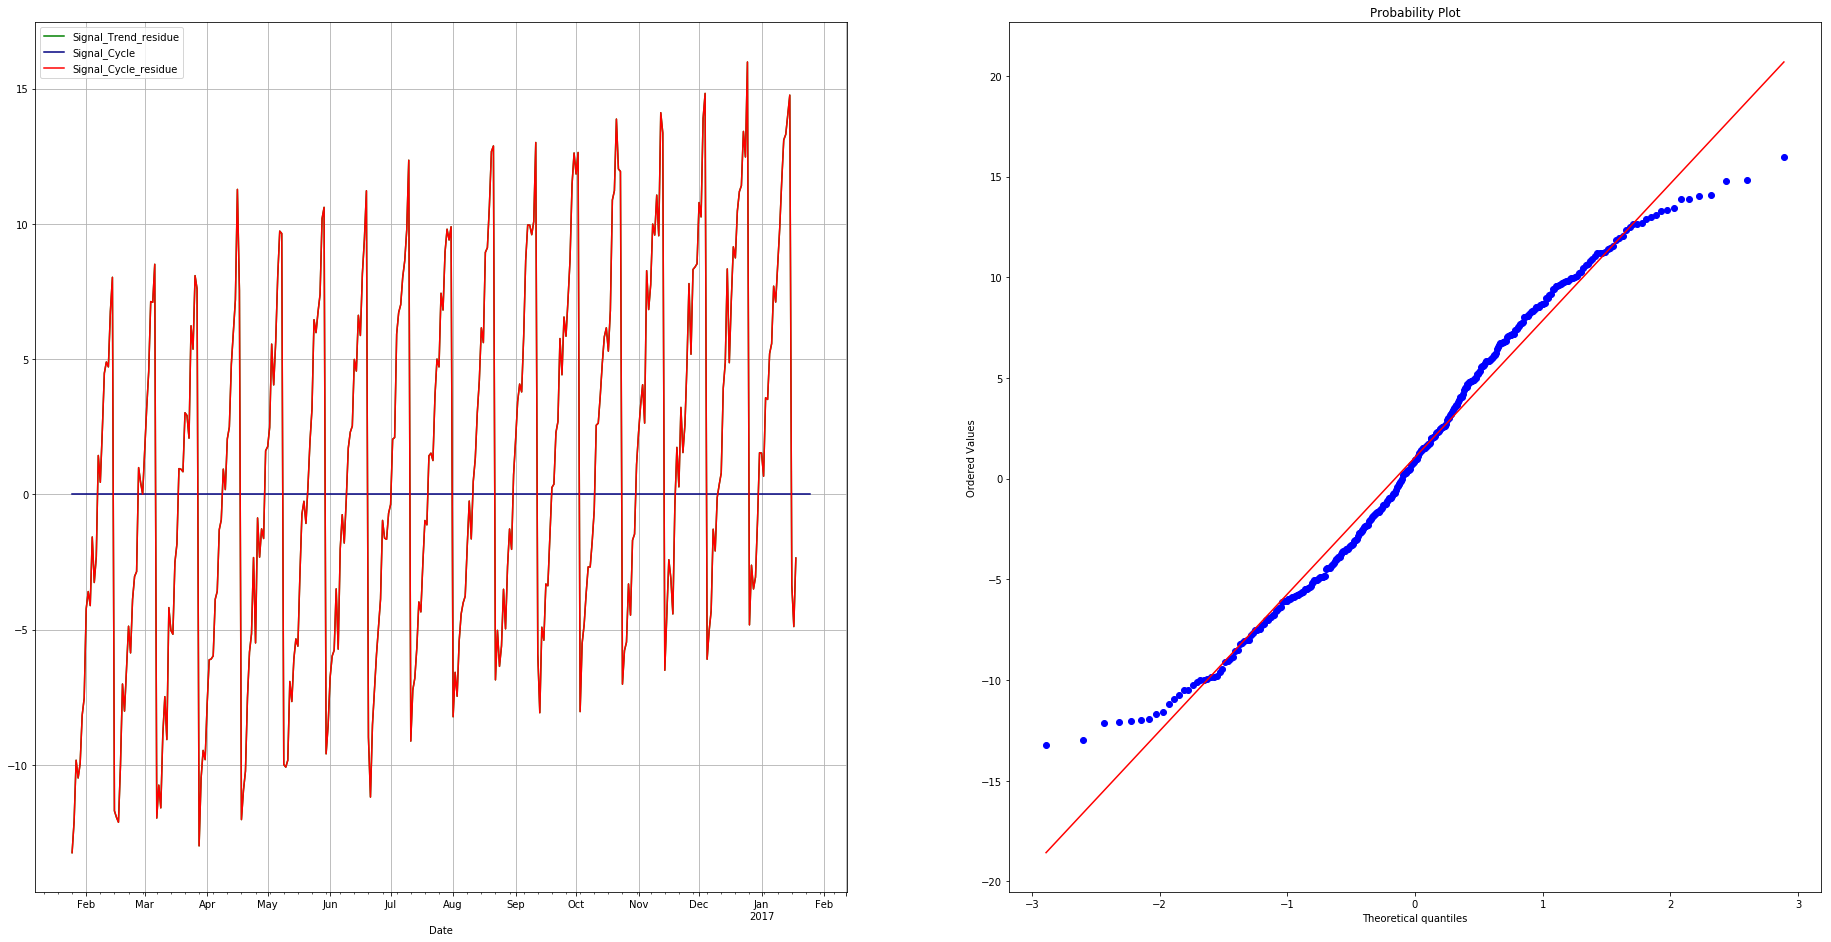

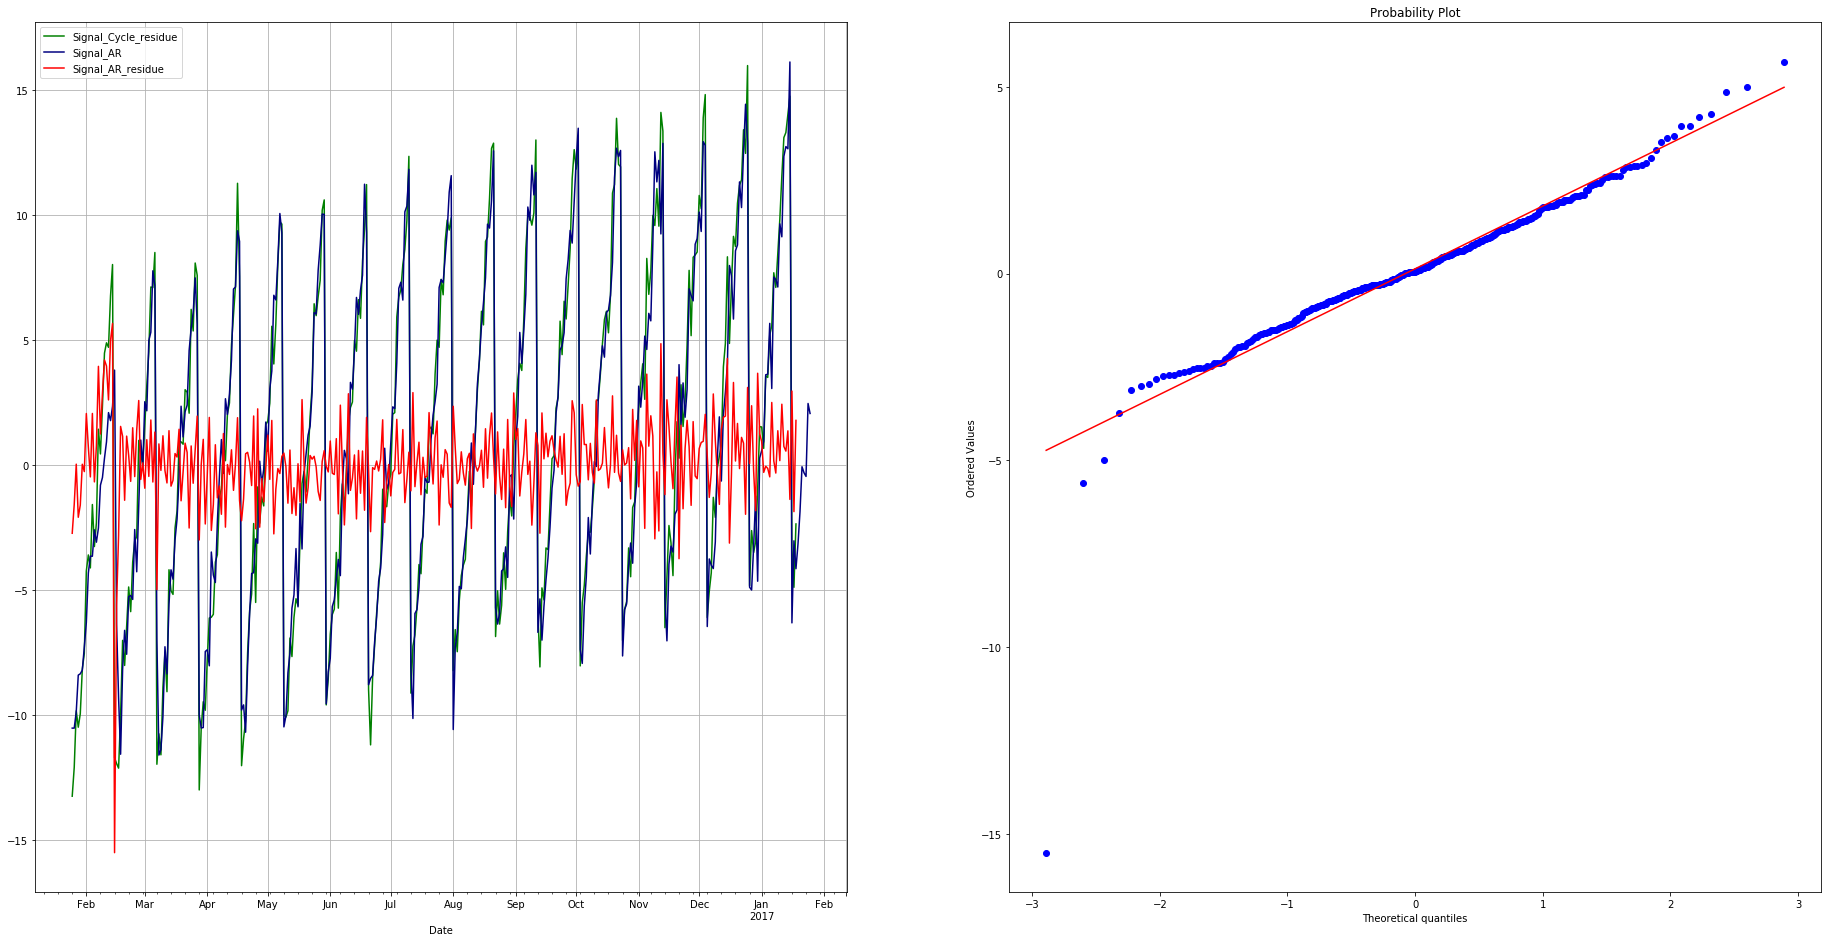

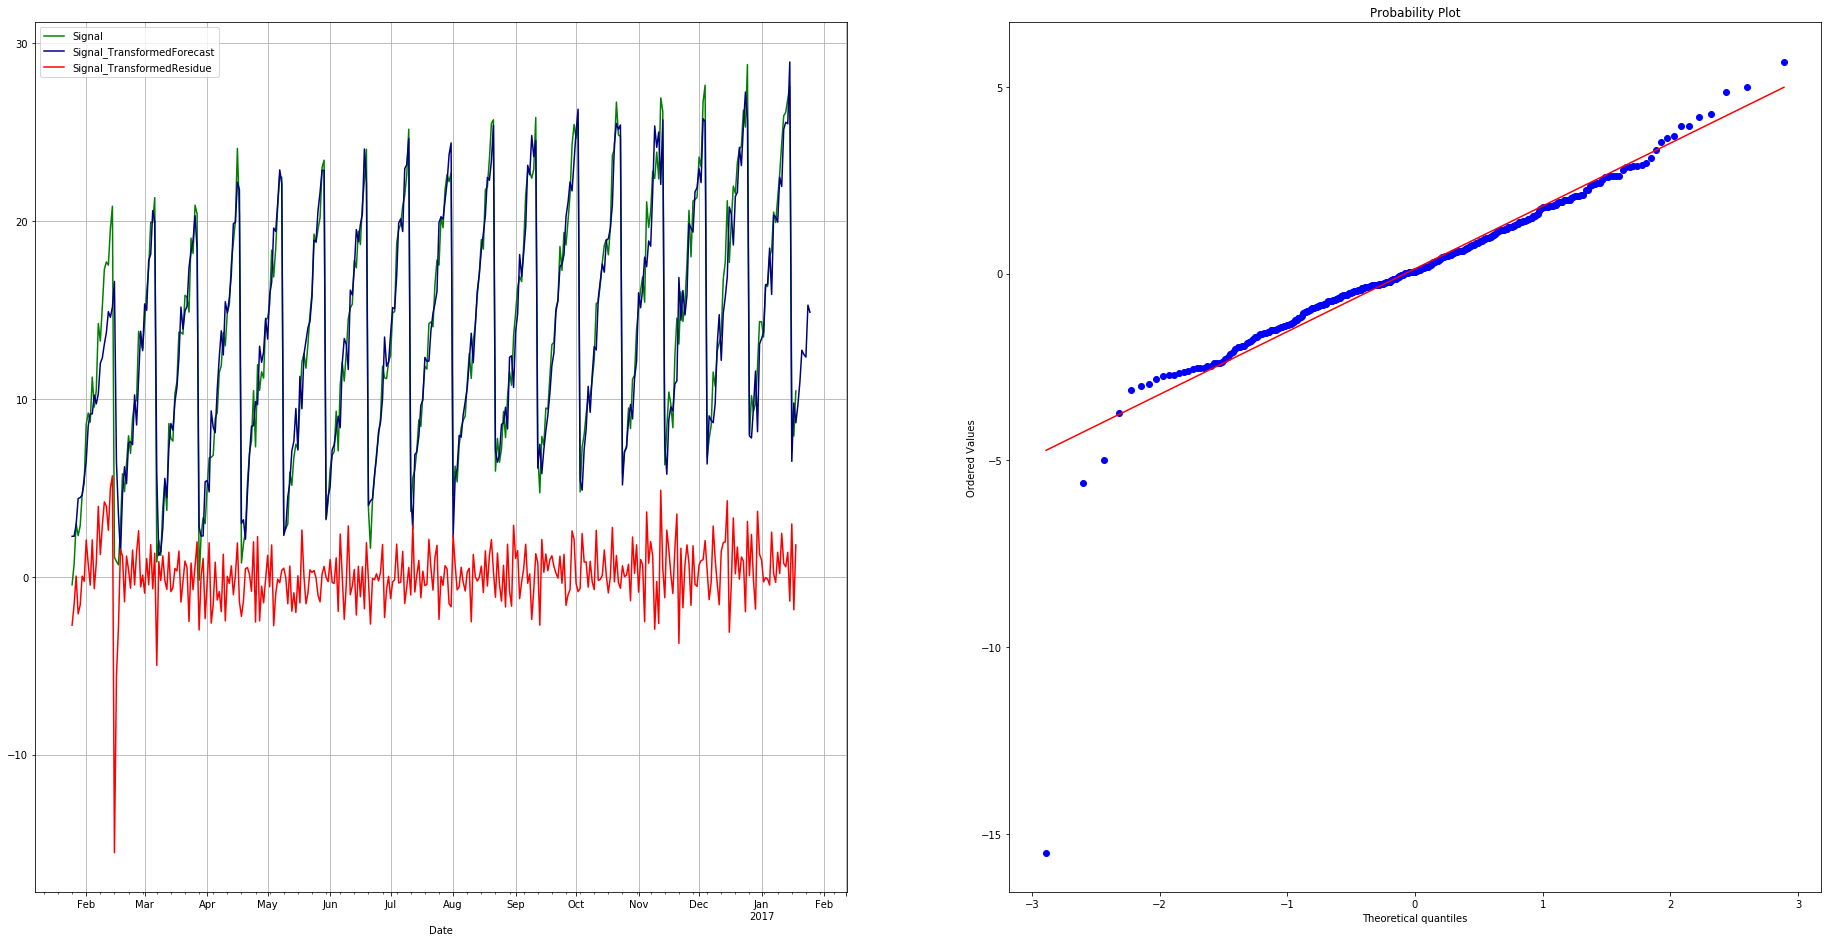

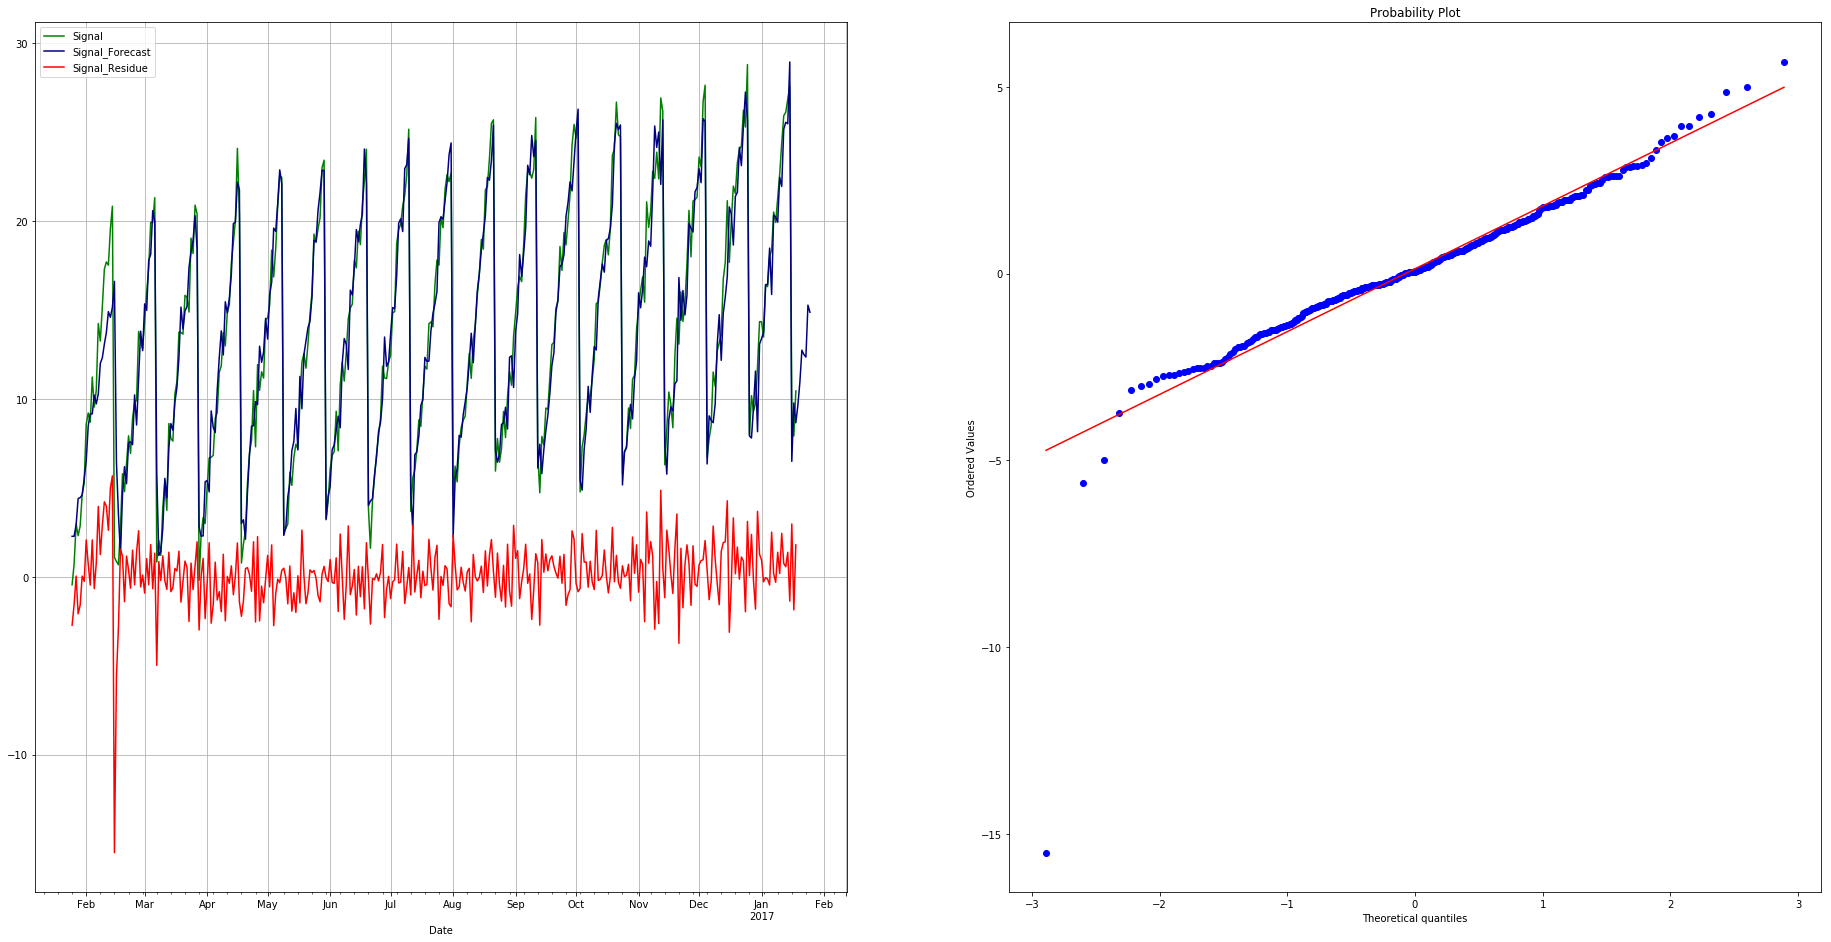

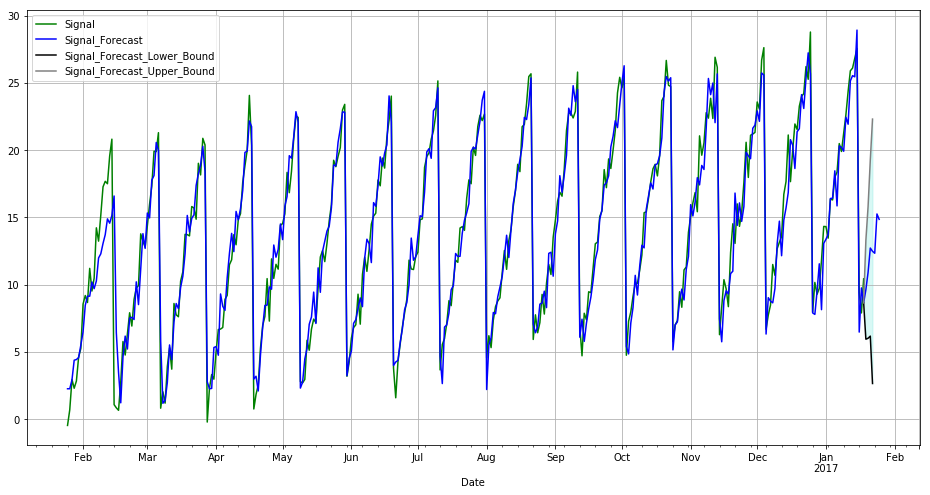

In [6]:
lEngine.standardPlots()

In [7]:

# predict one week
df_forecast = lEngine.forecast(iInputDS = df_train, iHorizon = 7)
# list the columns of the forecast dataset
print(df_forecast.columns) #

# print the real forecasts
# Future dates : ['2017-01-19T00:00:00.000000000' '2017-01-20T00:00:00.000000000' '2017-01-21T00:00:00.000000000' '2017-01-22T00:00:00.000000000' '2017-01-23T00:00:00.000000000' '2017-01-24T00:00:00.000000000' '2017-01-25T00:00:00.000000000']
print(df_forecast['Date'].tail(7).values)

# signal forecast : [ 9.74934646  10.04419761  12.15136455  12.20369717  14.09607727 15.68086323  16.22296559]
print(df_forecast['Signal_Forecast'].tail(7).values)

INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 0.7100002765655518


Index(['Date', 'Signal', '_Signal', 'row_number', 'Date_Normalized',
       '_Signal_ConstantTrend', '_Signal_ConstantTrend_residue',
       '_Signal_ConstantTrend_residue_zeroCycle',
       '_Signal_ConstantTrend_residue_zeroCycle_residue',
       '_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64)',
       '_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64)_residue',
       '_Signal_Trend', '_Signal_Trend_residue', '_Signal_Cycle',
       '_Signal_Cycle_residue', '_Signal_AR', '_Signal_AR_residue',
       '_Signal_TransformedForecast', 'Signal_Forecast',
       '_Signal_TransformedResidue', 'Signal_Residue',
       'Signal_Forecast_Lower_Bound', 'Signal_Forecast_Upper_Bound'],
      dtype='object')
['2017-01-19T00:00:00.000000000' '2017-01-20T00:00:00.000000000'
 '2017-01-21T00:00:00.000000000' '2017-01-22T00:00:00.000000000'
 '2017-01-23T00:00:00.000000000' '2017-01-24T00:00:00.000000000'
 '2017-01-25T00:00:00.000000000']
[ 9.62716757 10.92023484 12.7289083  12.48682365 12.3

In [8]:
import pickle

In [9]:
lEngine_str = pickle.dumps(lEngine)

In [10]:
lEngine_reloaded = pickle.loads(lEngine_str)

In [11]:
df_forecast_aftrer_reload = lEngine_reloaded.forecast(iInputDS = df_train, iHorizon = 7)

INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 0.6891534328460693


In [12]:
df_forecast_aftrer_reload

,Date,Signal,_Signal,row_number,Date_Normalized,_Signal_ConstantTrend,_Signal_ConstantTrend_residue,_Signal_ConstantTrend_residue_zeroCycle,_Signal_ConstantTrend_residue_zeroCycle_residue,_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64),...,_Signal_Cycle,_Signal_Cycle_residue,_Signal_AR,_Signal_AR_residue,_Signal_TransformedForecast,Signal_Forecast,_Signal_TransformedResidue,Signal_Residue,Signal_Forecast_Lower_Bound,Signal_Forecast_Upper_Bound
0,2016-01-25,-0.452028,-0.452028,0,0.000000,12.791763,-13.243792,0.0,-13.243792,-10.519289,...,0.0,-13.243792,-10.519289,-2.724503,2.272475,2.272475,-2.724503,-2.724503,NaN,NaN
1,2016-01-26,0.705471,0.705471,1,0.003559,12.791763,-12.086293,0.0,-12.086293,-10.519289,...,0.0,-12.086293,-10.519289,-1.567004,2.272475,2.272475,-1.567004,-1.567004,NaN,NaN
2,2016-01-27,2.964566,2.964566,2,0.007117,12.791763,-9.827197,0.0,-9.827197,-9.867052,...,0.0,-9.827197,-9.867052,0.039854,2.924712,2.924712,0.039854,0.039854,NaN,NaN
3,2016-01-28,2.309237,2.309237,3,0.010676,12.791763,-10.482527,0.0,-10.482527,-8.398340,...,0.0,-10.482527,-8.398340,-2.084186,4.393423,4.393423,-2.084186,-2.084186,NaN,NaN
4,2016-01-29,2.846719,2.846719,4,0.014235,12.791763,-9.945045,0.0,-9.945045,-8.347023,...,0.0,-9.945045,-8.347023,-1.598022,4.444741,4.444741,-1.598022,-1.598022,NaN,NaN
5,2016-01-30,4.626437,4.626437,5,0.017794,12.791763,-8.165326,0.0,-8.165326,-8.201959,...,0.0,-8.165326,-8.201959,0.036633,4.589805,4.589805,0.036633,0.036633,NaN,NaN
6,2016-01-31,5.260822,5.260822,6,0.021352,12.791763,-7.530942,0.0,-7.530942,-7.274140,...,0.0,-7.530942,-7.274140,-0.256802,5.517624,5.517624,-0.256802,-0.256802,NaN,NaN
7,2016-02-01,8.564410,8.564410,7,0.024911,12.791763,-4.227353,0.0,-4.227353,-6.292797,...,0.0,-4.227353,-6.292797,2.065444,6.498966,6.498966,2.065444,2.065444,NaN,NaN
8,2016-02-02,9.200623,9.200623,8,0.028470,12.791763,-3.591140,0.0,-3.591140,-4.311685,...,0.0,-3.591140,-4.311685,0.720545,8.480078,8.480078,0.720545,0.720545,NaN,NaN
9,2016-02-03,8.681337,8.681337,9,0.032028,12.791763,-4.110426,0.0,-4.110426,-3.640863,...,0.0,-4.110426,-3.640863,-0.469563,9.150900,9.150900,-0.469563,-0.469563,NaN,NaN


INFO:pyaf.std:START_PLOTTING
INFO:pyaf.std:END_PLOTTING_TIME_IN_SECONDS 2.2368149757385254


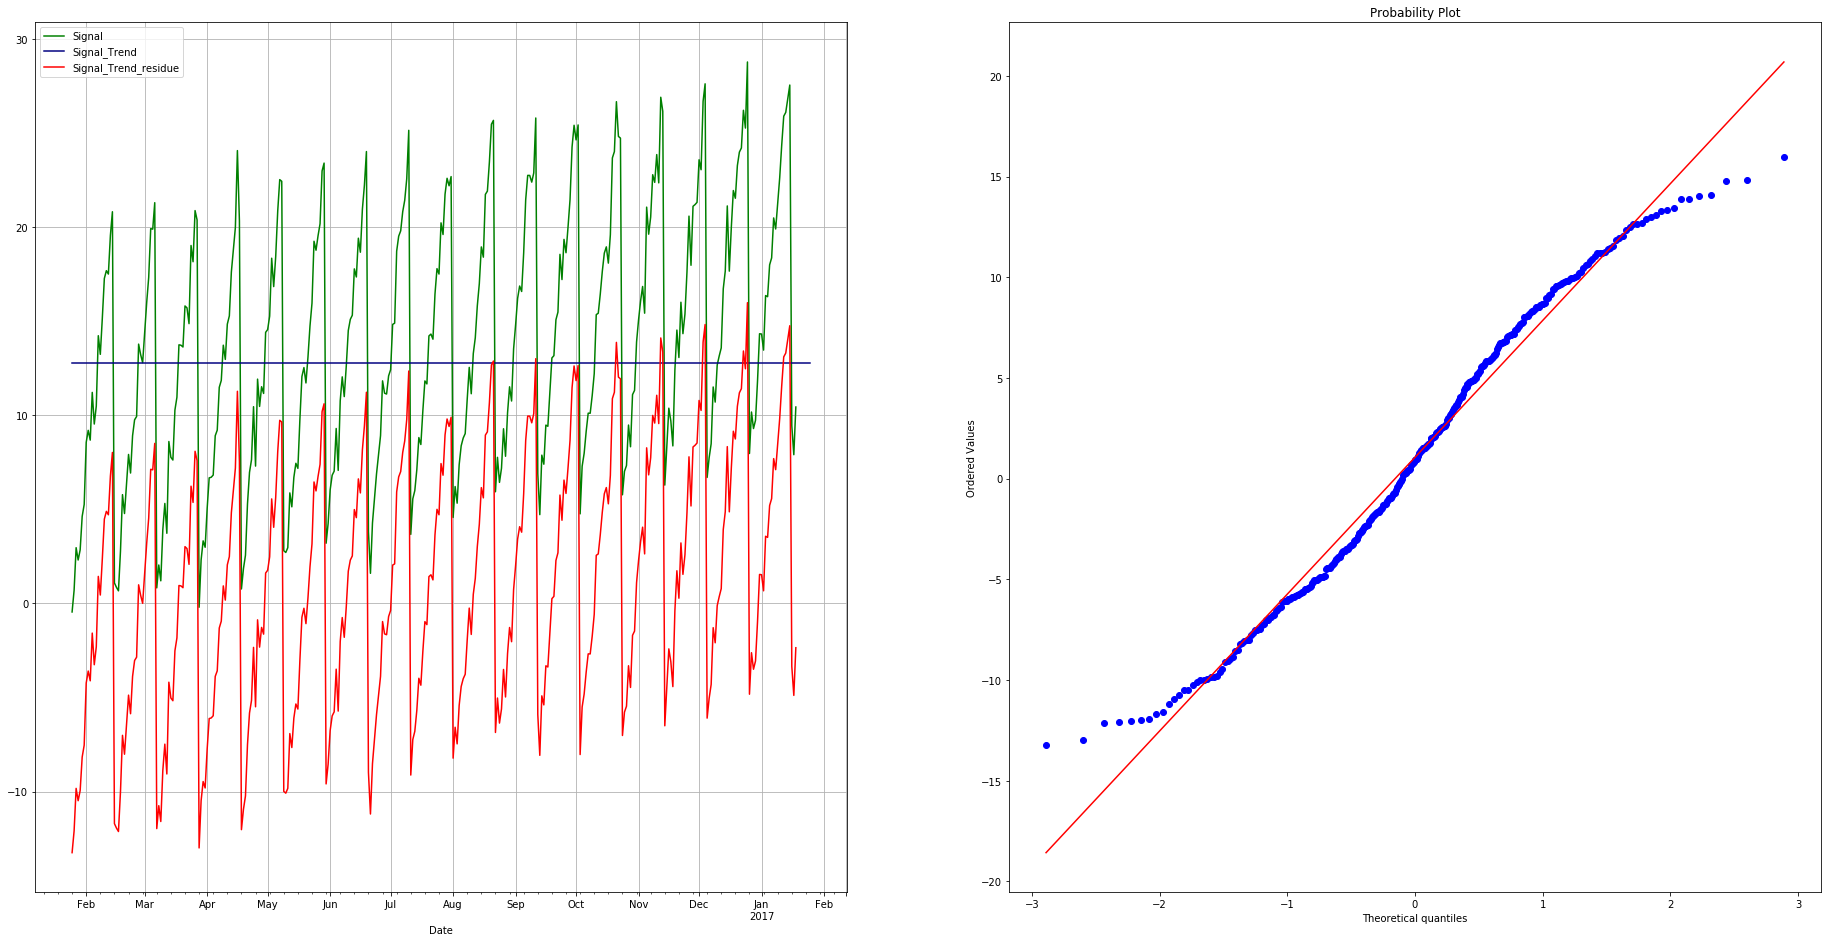

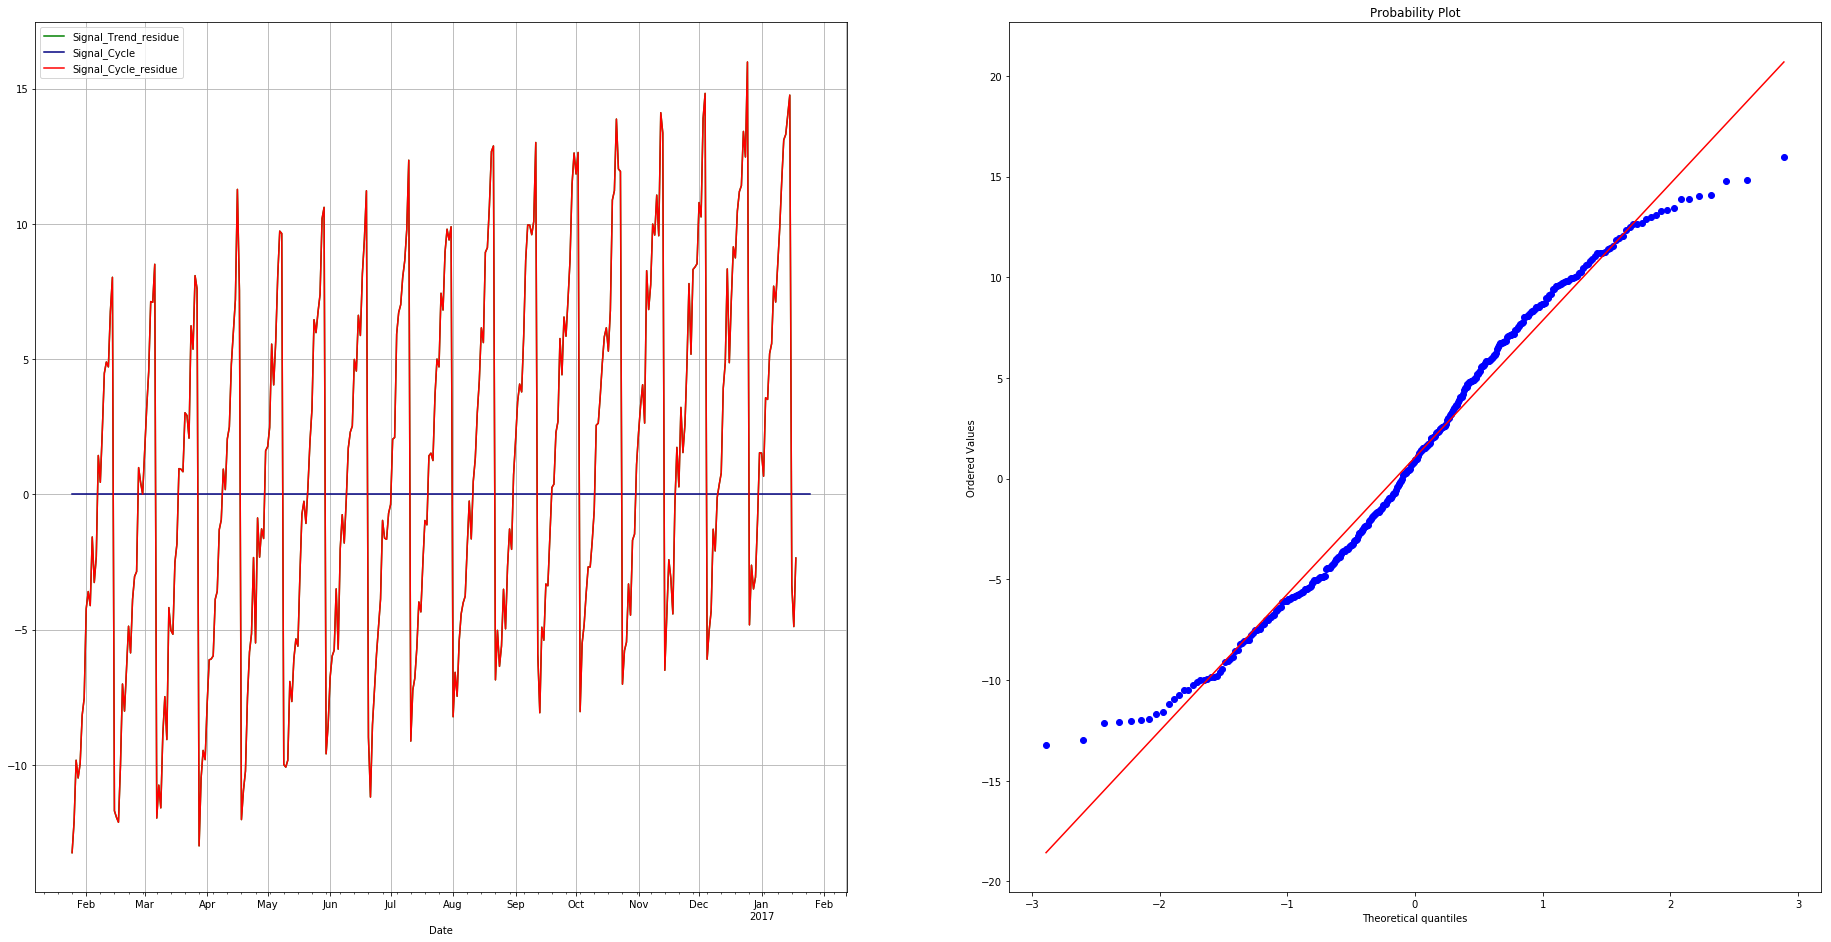

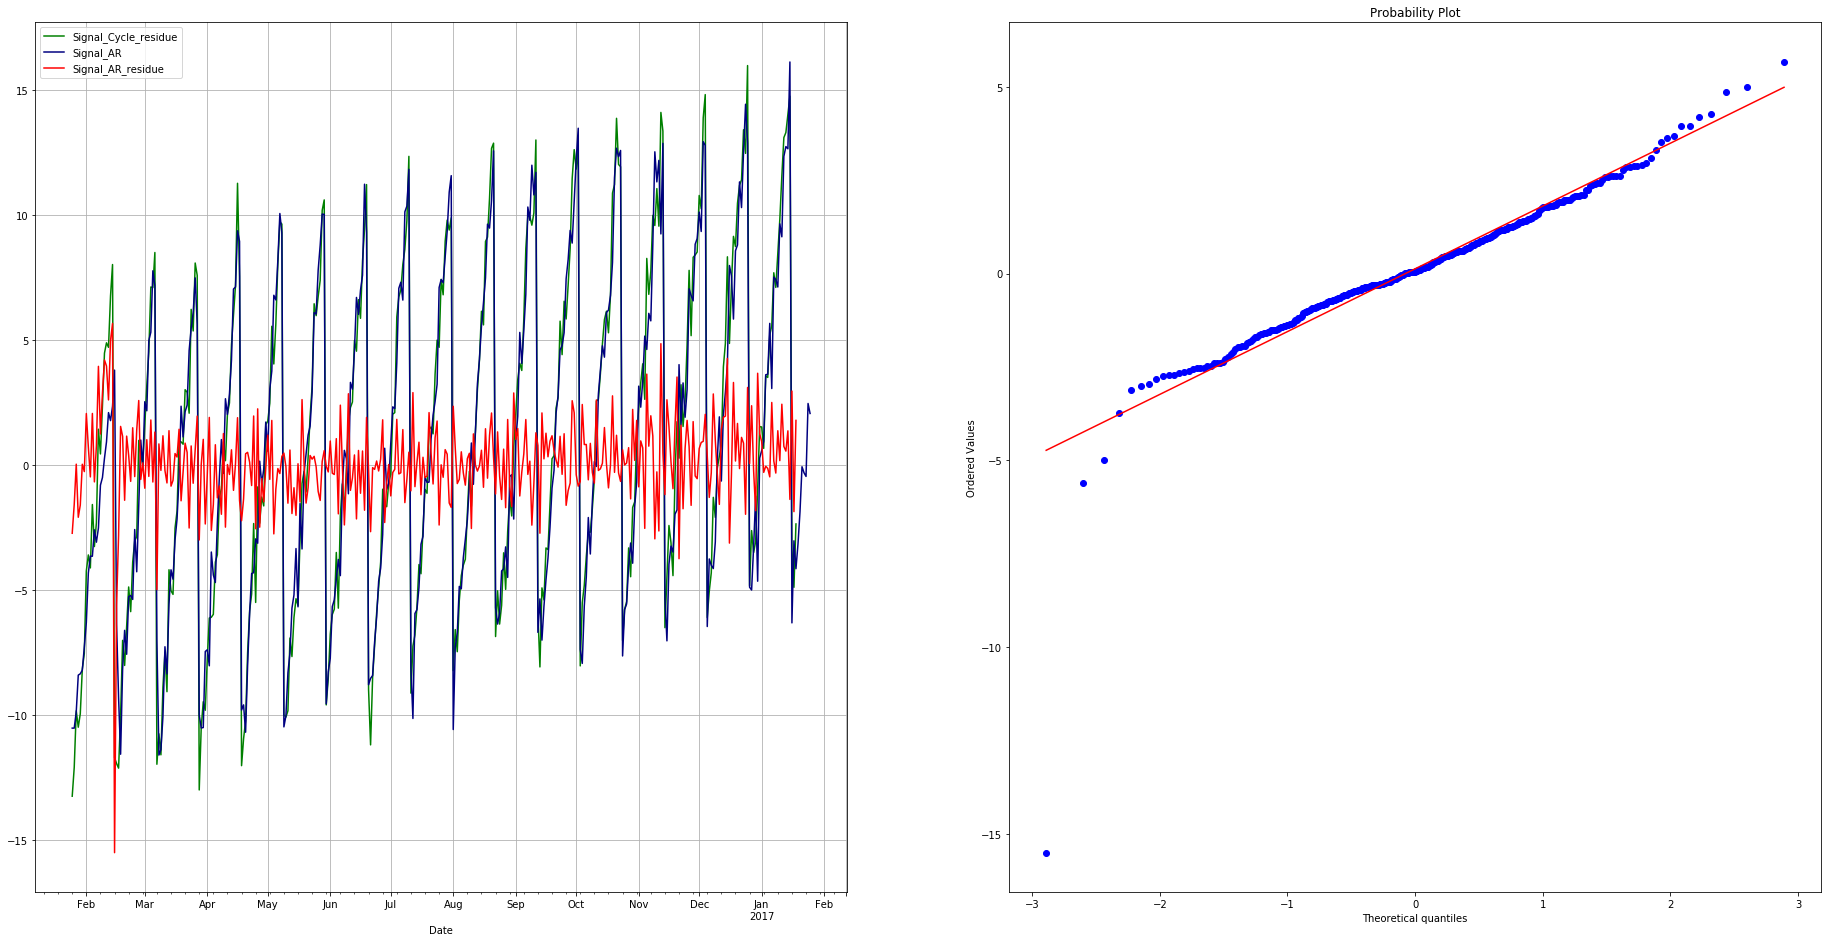

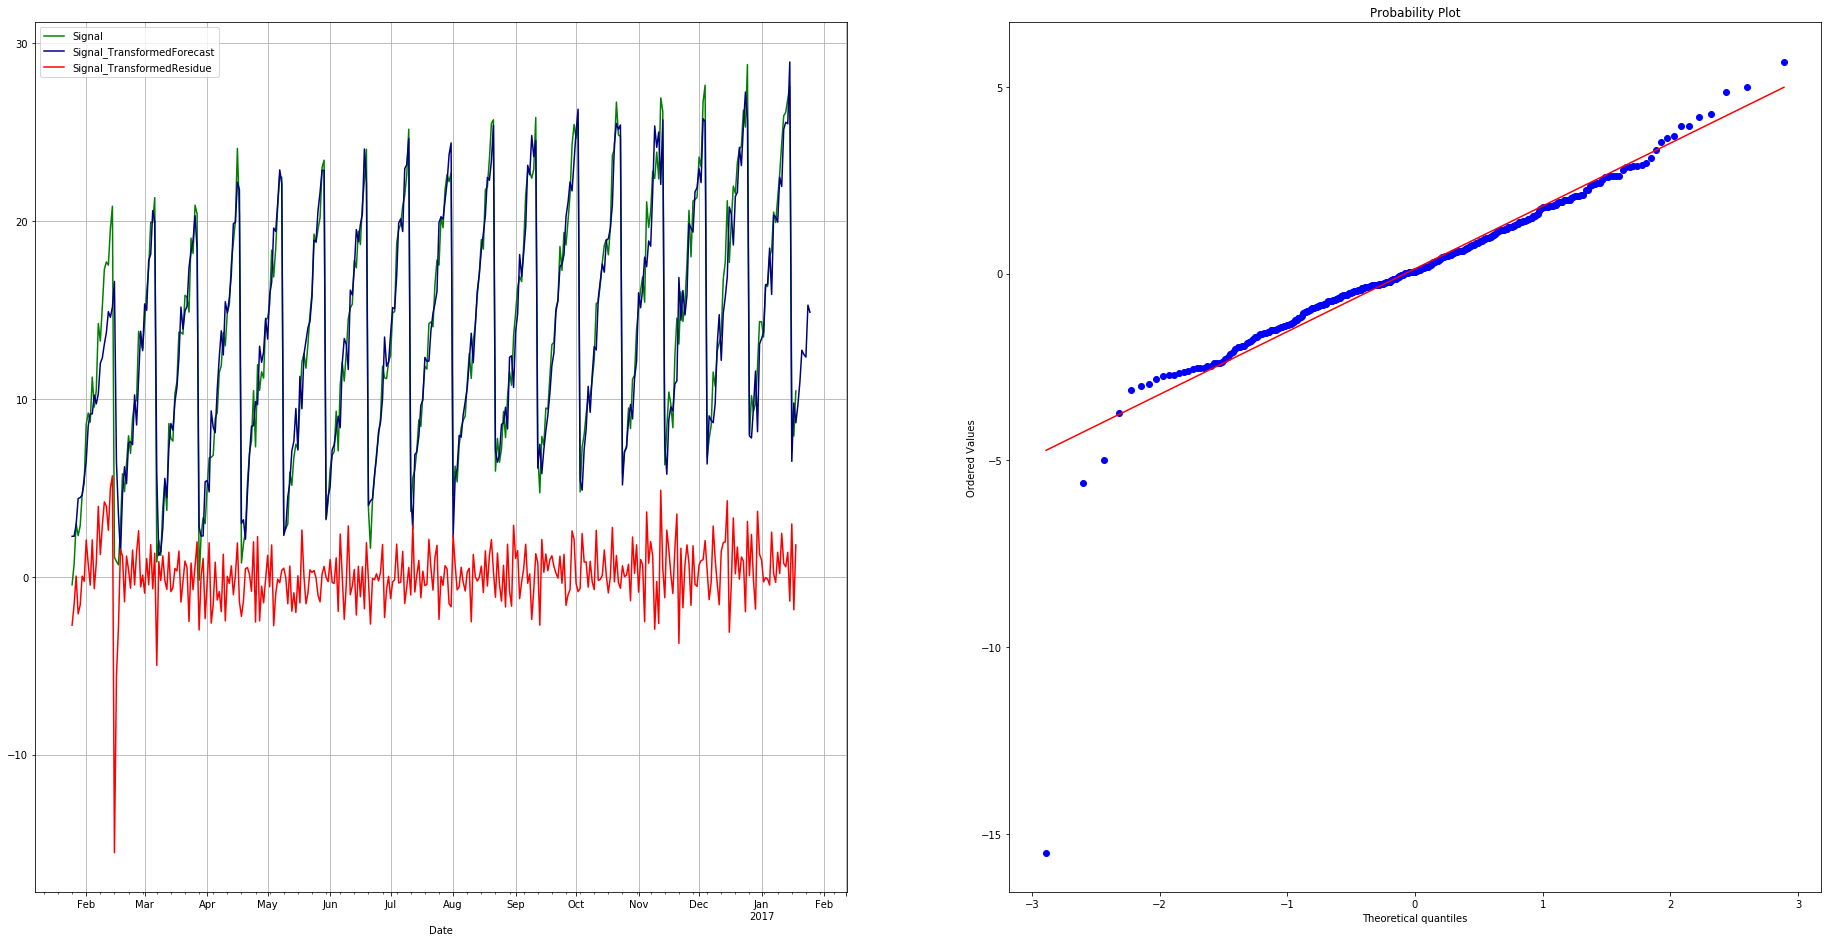

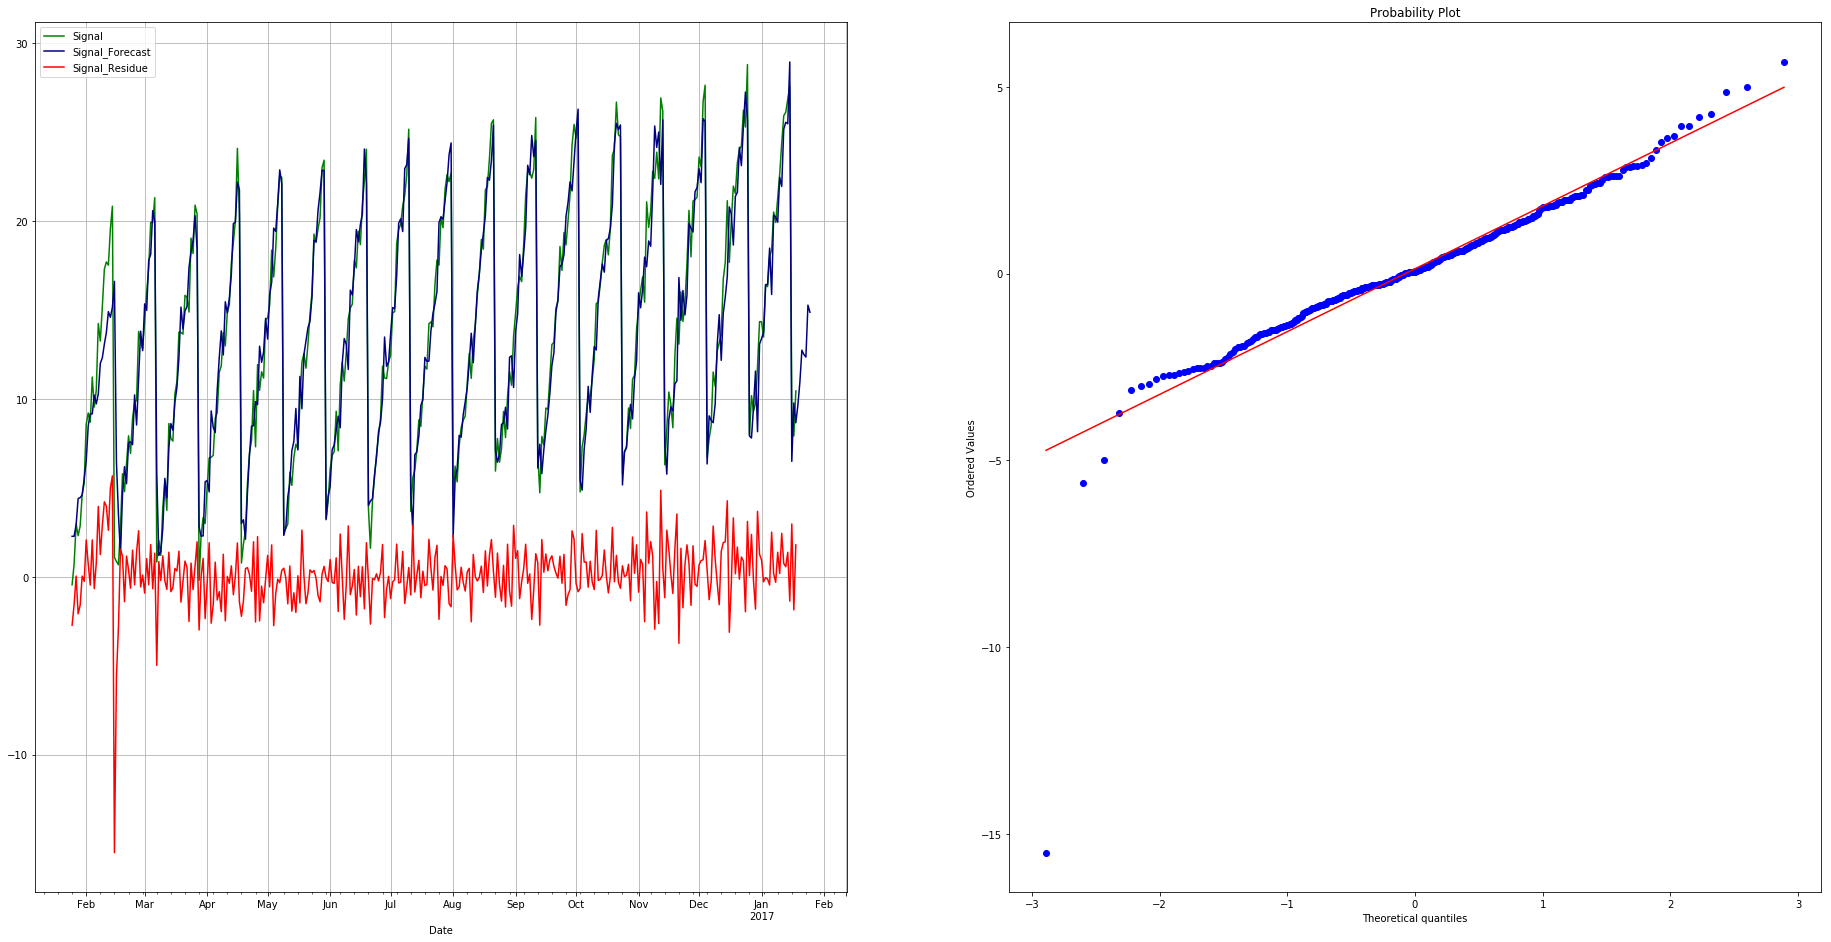

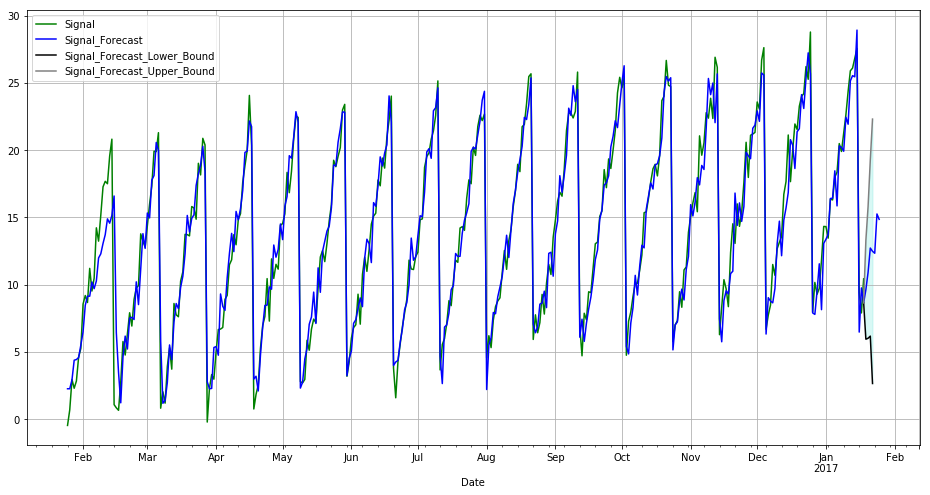

In [13]:
lEngine_reloaded.standardPlots()

In [14]:
df_forecast.describe()

,Signal,_Signal,row_number,Date_Normalized,_Signal_ConstantTrend,_Signal_ConstantTrend_residue,_Signal_ConstantTrend_residue_zeroCycle,_Signal_ConstantTrend_residue_zeroCycle_residue,_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64),_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64)_residue,...,_Signal_Cycle,_Signal_Cycle_residue,_Signal_AR,_Signal_AR_residue,_Signal_TransformedForecast,Signal_Forecast,_Signal_TransformedResidue,Signal_Residue,Signal_Forecast_Lower_Bound,Signal_Forecast_Upper_Bound
count,360.000000,360.000000,367.000000,367.000000,3.670000e+02,360.000000,367.0,360.000000,367.000000,360.000000,...,367.0,360.000000,367.000000,360.000000,367.000000,367.000000,360.000000,360.000000,7.000000,7.000000
mean,13.852103,13.852103,183.000000,0.651246,1.279176e+01,1.060340,0.0,1.060340,0.907634,0.131394,...,0.0,1.060340,0.907634,0.131394,13.699398,13.699398,0.131394,0.131394,-25.680598,50.887372
std,6.814282,6.814282,106.088014,0.377537,1.778782e-15,6.814282,0.0,6.814282,6.504990,1.777453,...,0.0,6.814282,6.504990,1.777453,6.504990,6.504990,1.777453,1.777453,54.476169,57.422297
min,-0.452028,-0.452028,0.000000,0.000000,1.279176e+01,-13.243792,0.0,-13.243792,-11.597746,-15.501773,...,0.0,-13.243792,-11.597746,-15.501773,1.194017,1.194017,-15.501773,-15.501773,-140.857339,13.299341
25%,8.379026,8.379026,91.500000,0.325623,1.279176e+01,-4.412737,0.0,-4.412737,-4.323456,-0.726803,...,0.0,-4.412737,-4.323456,-0.726803,8.468308,8.468308,-0.726803,-0.726803,-29.867457,17.544257
50%,13.725327,13.725327,183.000000,0.651246,1.279176e+01,0.933563,0.0,0.933563,0.560828,0.059103,...,0.0,0.933563,0.560828,0.059103,13.352592,13.352592,0.059103,0.059103,2.663301,22.310346
75%,19.523100,19.523100,274.500000,0.976868,1.279176e+01,6.731337,0.0,6.731337,6.350815,1.163428,...,0.0,6.731337,6.350815,1.163428,19.142579,19.142579,1.163428,1.163428,5.990815,57.468186
max,28.777351,28.777351,366.000000,1.302491,1.279176e+01,15.985588,0.0,15.985588,16.129555,5.669209,...,0.0,15.985588,16.129555,5.669209,28.921319,28.921319,5.669209,5.669209,6.183136,170.577031


In [15]:
df_forecast_aftrer_reload.describe()

,Signal,_Signal,row_number,Date_Normalized,_Signal_ConstantTrend,_Signal_ConstantTrend_residue,_Signal_ConstantTrend_residue_zeroCycle,_Signal_ConstantTrend_residue_zeroCycle_residue,_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64),_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64)_residue,...,_Signal_Cycle,_Signal_Cycle_residue,_Signal_AR,_Signal_AR_residue,_Signal_TransformedForecast,Signal_Forecast,_Signal_TransformedResidue,Signal_Residue,Signal_Forecast_Lower_Bound,Signal_Forecast_Upper_Bound
count,360.000000,360.000000,367.000000,367.000000,3.670000e+02,360.000000,367.0,360.000000,367.000000,360.000000,...,367.0,360.000000,367.000000,360.000000,367.000000,367.000000,360.000000,360.000000,7.000000,7.000000
mean,13.852103,13.852103,183.000000,0.651246,1.279176e+01,1.060340,0.0,1.060340,0.907634,0.131394,...,0.0,1.060340,0.907634,0.131394,13.699398,13.699398,0.131394,0.131394,-25.680598,50.887372
std,6.814282,6.814282,106.088014,0.377537,1.778782e-15,6.814282,0.0,6.814282,6.504990,1.777453,...,0.0,6.814282,6.504990,1.777453,6.504990,6.504990,1.777453,1.777453,54.476169,57.422297
min,-0.452028,-0.452028,0.000000,0.000000,1.279176e+01,-13.243792,0.0,-13.243792,-11.597746,-15.501773,...,0.0,-13.243792,-11.597746,-15.501773,1.194017,1.194017,-15.501773,-15.501773,-140.857339,13.299341
25%,8.379026,8.379026,91.500000,0.325623,1.279176e+01,-4.412737,0.0,-4.412737,-4.323456,-0.726803,...,0.0,-4.412737,-4.323456,-0.726803,8.468308,8.468308,-0.726803,-0.726803,-29.867457,17.544257
50%,13.725327,13.725327,183.000000,0.651246,1.279176e+01,0.933563,0.0,0.933563,0.560828,0.059103,...,0.0,0.933563,0.560828,0.059103,13.352592,13.352592,0.059103,0.059103,2.663301,22.310346
75%,19.523100,19.523100,274.500000,0.976868,1.279176e+01,6.731337,0.0,6.731337,6.350815,1.163428,...,0.0,6.731337,6.350815,1.163428,19.142579,19.142579,1.163428,1.163428,5.990815,57.468186
max,28.777351,28.777351,366.000000,1.302491,1.279176e+01,15.985588,0.0,15.985588,16.129555,5.669209,...,0.0,15.985588,16.129555,5.669209,28.921319,28.921319,5.669209,5.669209,6.183136,170.577031
